## **Predictive Analytics Terhadap Peristiwa Titanic**

Proyek ini bertujuan untuk menganalisis faktor-faktor yang berkontribusi terhadap peluang seorang penumpang untuk selamat dari tragedi. Masalah ini relevan untuk dipelajari karena dapat memberikan wawasan tentang pola keselamatan dan pengambilan keputusan di situasi darurat.

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly.express as px

# For Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


## **Loading Dataset**

In [ ]:
data = sns.load_dataset('titanic')

print("Data Titanic:")
print(data.head())

Data Titanic:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## **Exploratory Data Analysis**

In [ ]:
print("Deskripsi Data:")
print(data.describe(include='all'))
print("\nInfo Data:")
print(data.info())

Deskripsi Data:
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town al

## **Exploratory Data Analysis**

In [ ]:
# Mengecek nilai yang hilang di setiap kolom
print("Nilai yang Hilang:")
print(data.isnull().sum())

# Mengisi nilai yang hilang
data['age'] = data['age'].fillna(data['age'].mean())  # Menggunakan pengisian tanpa inplace
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])  # Menggunakan pengisian tanpa inplace

# Cek jika kolom 'deck' ada, lalu mengisinya
if 'deck' in data.columns:
    # Jika deck ada, pastikan ini di-cast ke object agar 'Unknown' bisa diterima
    data['deck'] = data['deck'].astype(str).fillna('Unknown')

data['embark_town'] = data['embark_town'].fillna('Unknown')  # Menggunakan pengisian tanpa inplace

# Menghapus kolom yang sudah tidak ada diperlukan
data.drop(columns=['deck'], inplace=True, errors='ignore')
data.dropna(inplace=True)  # Hanya jika masih ada nilai hilang yang tersisa

print("Nilai yang Hilang Setelah Ditangani:")
print(data.isnull().sum())

Nilai yang Hilang:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Nilai yang Hilang Setelah Ditangani:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## **Exploratory Data Analysis - Univariate Analysis**

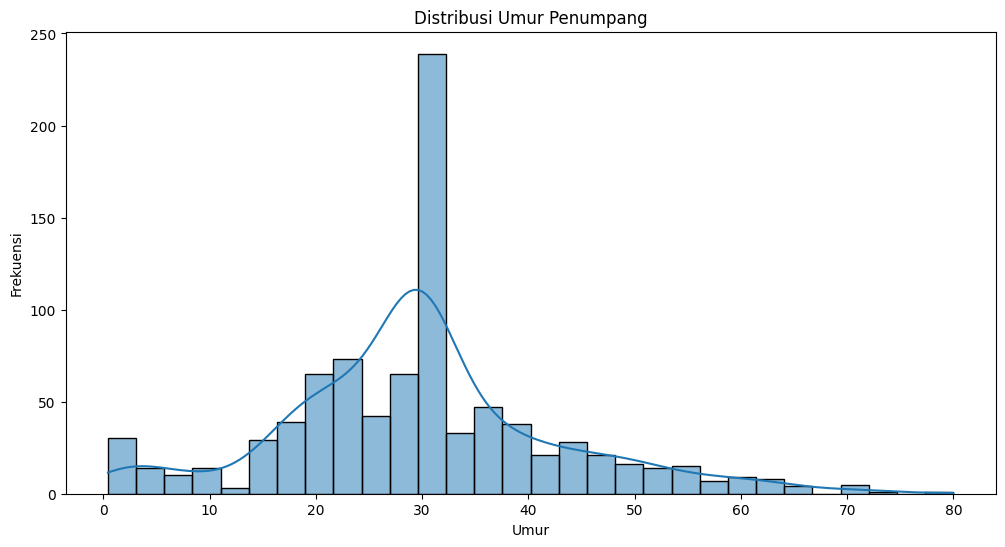

In [ ]:
# Visualisasi distribusi umur
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribusi Umur Penumpang')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

## **Exploratory Data Analysis - Multivariate Analysis**

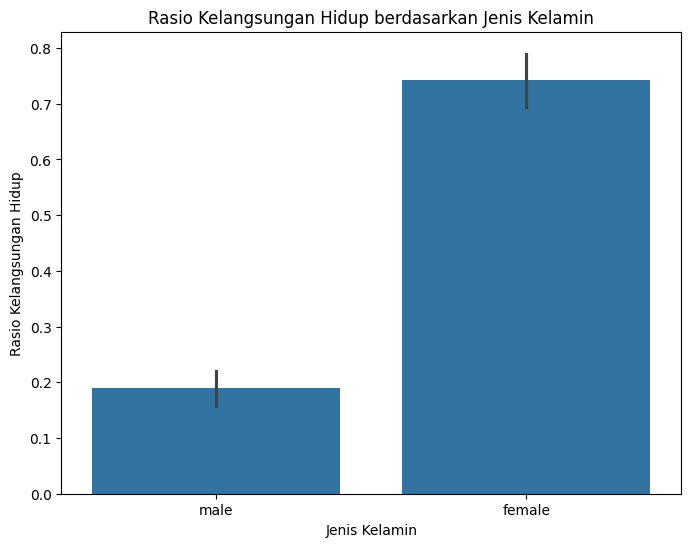

In [ ]:
# Visualisasi rasio kelangsungan hidup berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=data)
plt.title('Rasio Kelangsungan Hidup berdasarkan Jenis Kelamin')
plt.ylabel('Rasio Kelangsungan Hidup')
plt.xlabel('Jenis Kelamin')
plt.show()

## **Data Preparation**

In [ ]:
# Mengonversi kolom kategorikal menjadi dummy variables
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass', 'embark_town'], drop_first=True)

# Memeriksa kolom yang ada di dalam DataFrame
print("Kolom yang ada dalam DataFrame:")
print(data.columns)

# Memisahkan fitur dan label
features_to_drop = ['survived', 'name', 'ticket', 'passenger_id']
# Hanya simpan kolom yang ada dalam daftar untuk dihapus
features_to_drop = [col for col in features_to_drop if col in data.columns]

X = data.drop(columns=features_to_drop)  # Menghapus kolom yang relevan
y = data['survived']  # Menyimpan kolom label

Kolom yang ada dalam DataFrame:
Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'alive', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'pclass_2', 'pclass_3', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embark_town_Unknown'],
      dtype='object')


In [ ]:
# Konversi kolom kategorikal 'class', 'who', dan 'alive' ke dummy variables
columns_to_convert = ['class', 'who', 'alive']
data = pd.get_dummies(data, columns=columns_to_convert, drop_first=True)

# Memisahkan fitur dan label kembali
features_to_drop = ['survived', 'name', 'ticket', 'passenger_id']
features_to_drop = [col for col in features_to_drop if col in data.columns]
X = data.drop(columns=features_to_drop)
y = data['survived']

# Cek tipe data fitur X lagi setelah konversi
print("Tipe data dari fitur X setelah konversi:")
print(X.dtypes)

Tipe data dari fitur X setelah konversi:
age                        float64
sibsp                        int64
parch                        int64
fare                       float64
adult_male                    bool
alone                         bool
sex_male                      bool
embarked_Q                    bool
embarked_S                    bool
pclass_2                      bool
pclass_3                      bool
embark_town_Queenstown        bool
embark_town_Southampton       bool
embark_town_Unknown           bool
class_Second                  bool
class_Third                   bool
who_man                       bool
who_woman                     bool
alive_yes                     bool
dtype: object


## **Data Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Development Random Forerst**

In [ ]:
# Model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi
knn_predictions = knn.predict(X_test)

# Evaluasi
print(f"Akurasi K-Nearest Neighbors: {accuracy_score(y_test, knn_predictions):.2f}")
print("Laporan Klasifikasi KNN:\n", classification_report(y_test, knn_predictions))

Akurasi K-Nearest Neighbors: 0.77
Laporan Klasifikasi KNN:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       105
           1       0.81      0.57      0.67        74

    accuracy                           0.77       179
   macro avg       0.78      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179



In [ ]:
# Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
rf_predictions = rf.predict(X_test)

# Evaluasi
print(f"Akurasi Random Forest: {accuracy_score(y_test, rf_predictions):.2f}")
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, rf_predictions))

Akurasi Random Forest: 1.00
Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
# Model Boosting dengan Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Prediksi
gb_predictions = gb.predict(X_test)

# Evaluasi
print(f"Akurasi Gradient Boosting: {accuracy_score(y_test, gb_predictions):.2f}")
print("Laporan Klasifikasi Gradient Boosting:\n", classification_report(y_test, gb_predictions))

Akurasi Gradient Boosting: 1.00
Laporan Klasifikasi Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## **Evaluasi Model**

In [ ]:
# Membandingkan akurasi dari semua model
accuracies = {
    'KNN': accuracy_score(y_test, knn_predictions),
    'Random Forest': accuracy_score(y_test, rf_predictions),
    'Gradient Boosting': accuracy_score(y_test, gb_predictions)
}

print("Akurasi Semua Model:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}")

Akurasi Semua Model:
KNN: 0.77
Random Forest: 1.00
Gradient Boosting: 1.00
